In [ ]:
!pip install -q condacolab

import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
!conda install tsnecuda -c conda-forge

Channels:
 - conda-forge
Platform: linux-64
Solving environment: \ | / done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.3
    latest version: 25.1.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.



Imports

In [ ]:
import tsnecuda
tsnecuda.test() # this should work without any error

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml

sns.set()

In [ ]:
colors = ['#fe7c73', '#2471A3', '#3498DB', '#27AE60', '#82E0AA', '#D35400', '#5D6D7E', '#E74C3C', '#21618C', '#B7950B', '#46C7C7', '#00B9FF']

Load dataset

In [ ]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784')

# Extract features and labels
X, y = mnist['data'], mnist['target']

# Convert to numpy arrays
X = X.to_numpy().astype('float32')
y = y.to_numpy().astype('int')

# Print the shape of the arrays
print("Shape of features (X):", X.shape)
print("Shape of labels (y):", y.shape)

Shape of features (X): (70000, 784)
Shape of labels (y): (70000,)


Sample rows

In [ ]:
# Get the number of rows in X
num_rows = X.shape[0]

# Randomly sample 8,000 indices
random_indices = np.random.choice(num_rows, size=8000, replace=False)

# Select the rows based on the randomly sampled indices
sampled_X = X[random_indices]
sampled_y = y[random_indices]

# tSNE CUDA

In [ ]:
from tsnecuda import TSNE as TSNE_GPU

In [ ]:
%%timeit

X_embedded_gpu = TSNE_GPU(n_components=2, learning_rate=20, perplexity=25).fit_transform(sampled_X)

3.09 s ± 43.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
X_embedded_gpu = TSNE_GPU(n_components=2, learning_rate=20, perplexity=25).fit_transform(sampled_X)

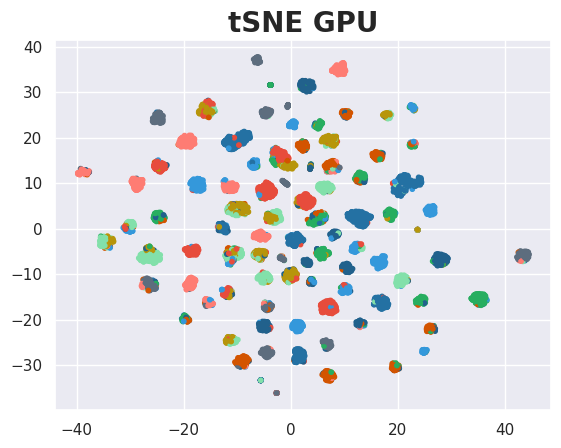

In [ ]:
fig, ax = plt.subplots()

ax.scatter(X_embedded_gpu[:, 0], X_embedded_gpu[:, 1], c = [colors[i] for i in sampled_y], s=10)

ax.set_title("tSNE GPU", fontsize=20, weight="bold")
plt.savefig("./tsne_gpu.jpeg", dpi=300, bbox_inches="tight")

plt.show()

# tSNE Sklearn

In [ ]:
from sklearn.manifold import TSNE as TSNE_CPU

In [ ]:
%%timeit -n 1 -r 1

X_embedded_cpu = TSNE_CPU(n_components=2, learning_rate=20, perplexity=25).fit_transform(sampled_X)

1min 10s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
X_embedded_cpu = TSNE_CPU(n_components=2, learning_rate=20, perplexity=25).fit_transform(sampled_X)

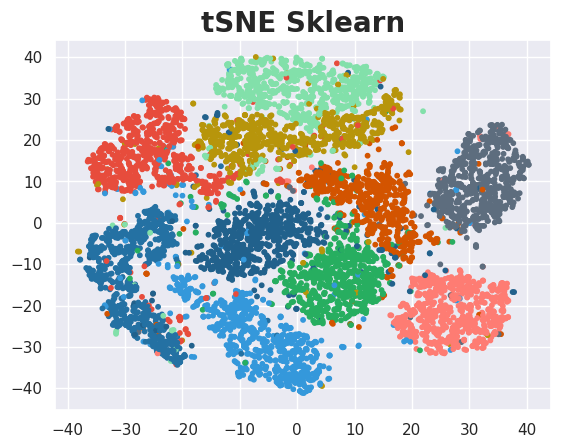

In [ ]:
fig, ax = plt.subplots()

ax.scatter(X_embedded_cpu[:, 0], X_embedded_cpu[:, 1], c = [colors[i] for i in sampled_y], s=10)

ax.set_title("tSNE Sklearn", fontsize=20, weight="bold")
plt.savefig("./tsne_cpu.jpeg", dpi=300, bbox_inches="tight")
plt.show()